# Multi Linear Regression

### Probelm Statement :-

    - Build model to predict the price of Toyota Corolla 

### Data Understanding

In [1]:
import pandas as pd
import numpy as np
tc = pd.read_csv ("~/desktop/Digi 360/Module 7/ToyotaCorolla.csv",encoding='mac_roman')
tc.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0


In [2]:
#Select required columns given in the probem statement
tc1 = tc[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
tc1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [3]:
#Renaming columns
tc1 = tc1.rename(columns = {'Price':'price','Age_08_04':'age','KM':'km','HP':'hp','Doors':'door','Gears':'gear','Quarterly_Tax':'qrt','Weight':'wgt'})
tc1.head()

,price,age,km,hp,cc,door,gear,qrt,wgt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Data Visualization

<Figure size 720x432 with 0 Axes>

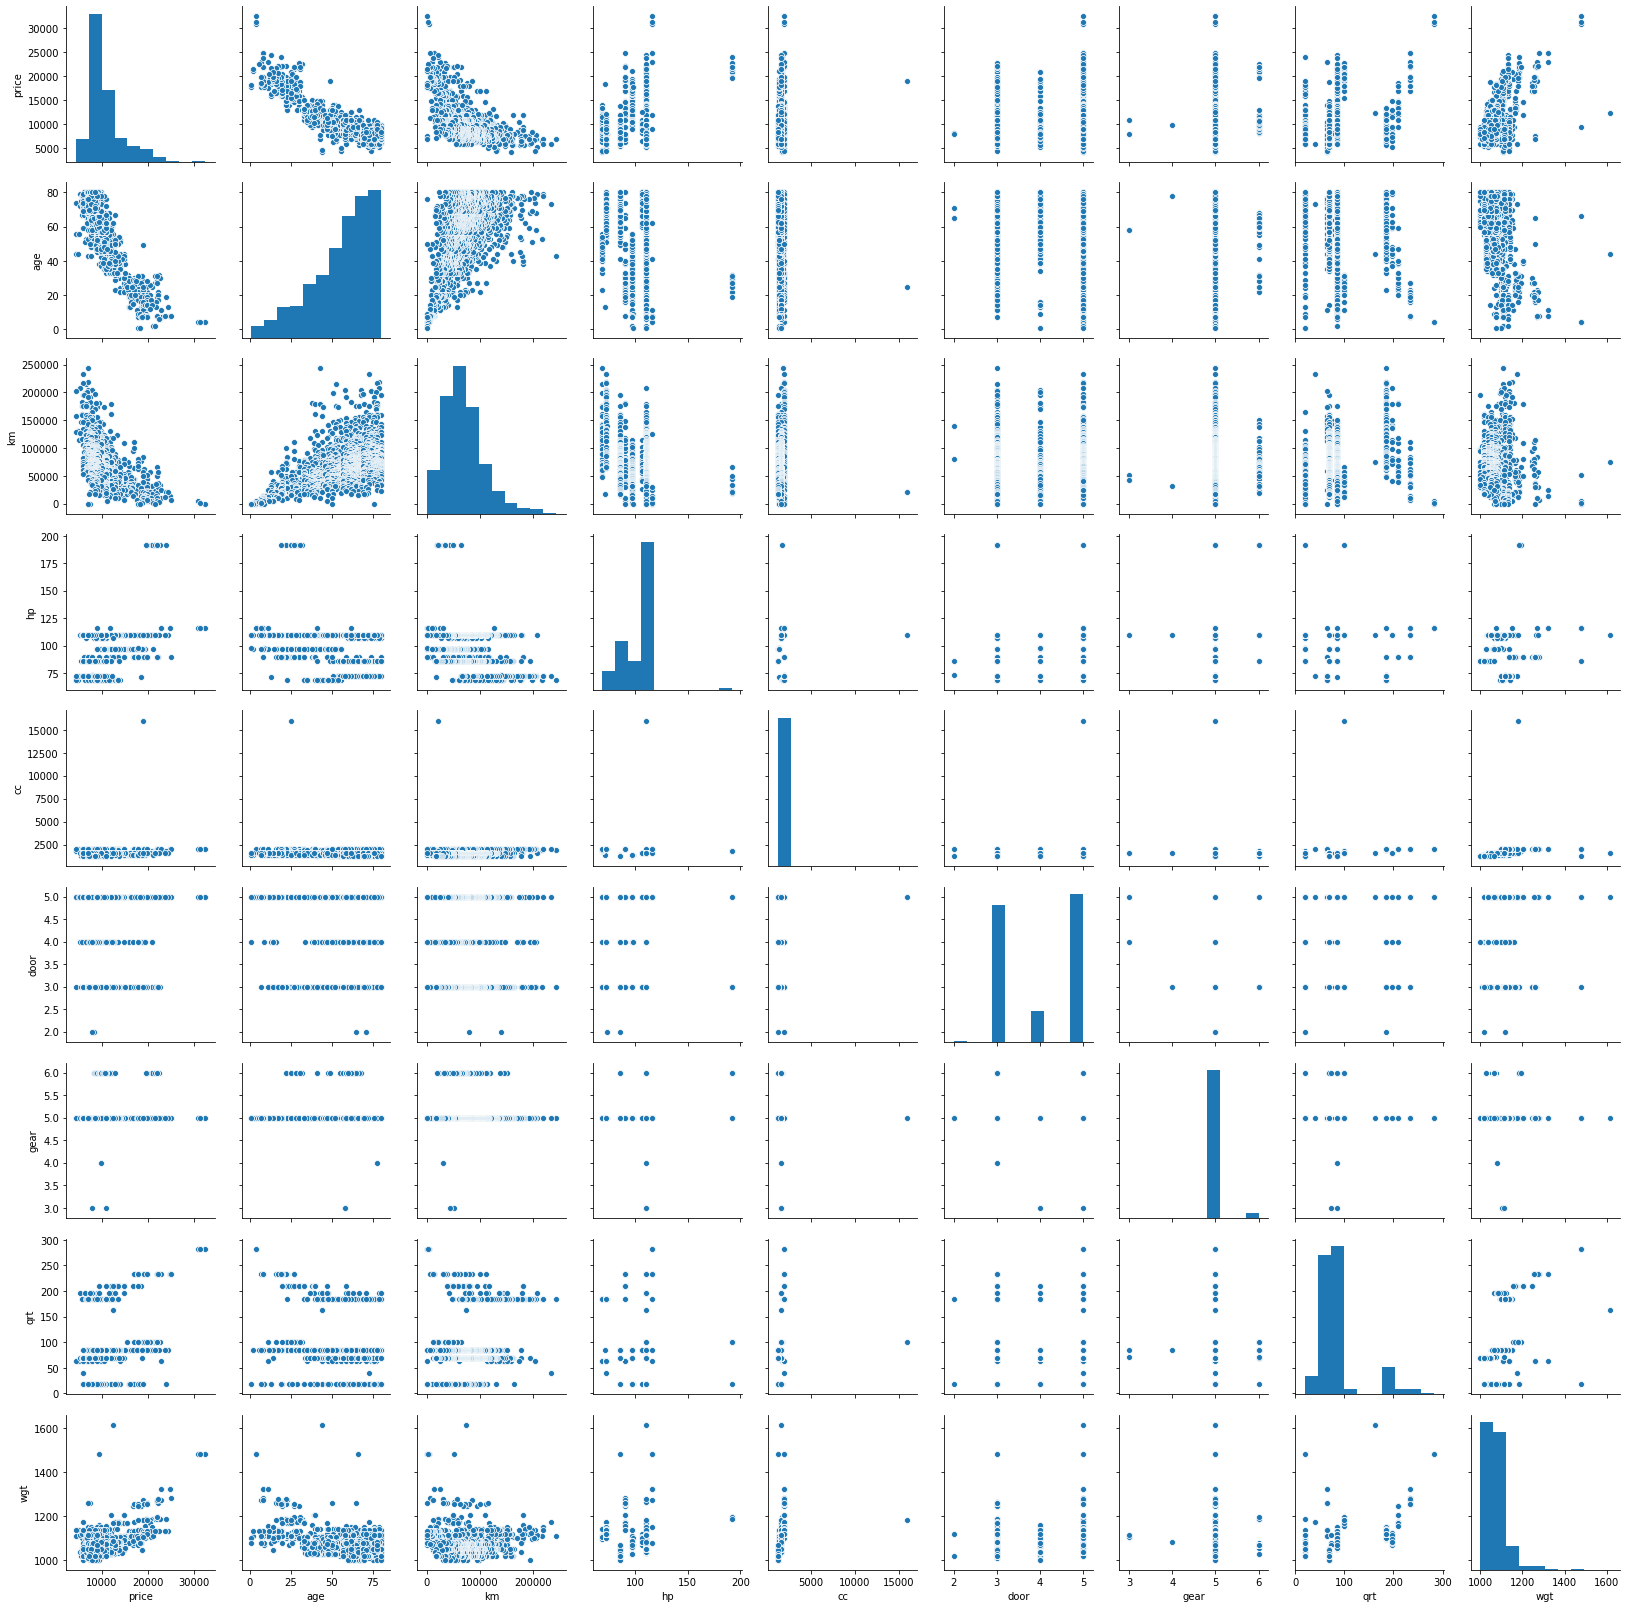

In [6]:
#Let's visulaize the numeric varibles using scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
sns.pairplot(tc1)
plt.show()

### Building the model

In [7]:
##finding the correlation coefficient
tc1.corr()

,price,age,km,hp,cc,door,gear,qrt,wgt
price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
door,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
gear,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qrt,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
wgt,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [9]:
#Preparing model with all variables
import statsmodels.formula.api as smf
model1 = smf.ols('price~age+km+hp+cc+door+gear+qrt+wgt',data=tc1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:43:10   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.0

### Checking VIF

In [12]:
###calculating VIF values for age
rsq_ag = smf.ols('age~km+hp+cc+door+gear+qrt+wgt',data=tc1).fit().rsquared
vif_ag= 1/(1-rsq_ag)
print(vif_ag)

1.8846198056602865


In [13]:
###calculating VIF values for hp
rsq_hp = smf.ols('hp~km+age+cc+door+gear+qrt+wgt',data=tc1).fit().rsquared
vif_hp= 1/(1-rsq_hp)
print(vif_hp)

1.4194221086310979


In [14]:
###calculating VIF values for km
rsq_km = smf.ols('km~age+hp+cc+door+gear+qrt+wgt',data=tc1).fit().rsquared
vif_km= 1/(1-rsq_km)
print(vif_km)

1.7569047782042881


In [15]:
###calculating VIF values for age
rsq_cc = smf.ols('cc~km+hp+age+door+gear+qrt+wgt',data=tc1).fit().rsquared
vif_cc= 1/(1-rsq_cc)
print(vif_cc)

1.1638939849423795


In [16]:
###calculating VIF values for age
rsq_dr = smf.ols('door~km+hp+cc+age+gear+qrt+wgt',data=tc1).fit().rsquared
vif_dr= 1/(1-rsq_dr)
print(vif_dr)

1.1565752070760438


In [17]:
###calculating VIF values for gear
rsq_gr = smf.ols('gear~km+hp+cc+door+age+qrt+wgt',data=tc1).fit().rsquared
vif_gr= 1/(1-rsq_gr)
print(vif_gr)

1.0987230193470365


In [18]:
###calculating VIF values for quartely tax
rsq_qr = smf.ols('qrt~km+hp+cc+door+gear+age+wgt',data=tc1).fit().rsquared
vif_qr= 1/(1-rsq_qr)
print(vif_qr)

2.311430811531038


In [19]:
###calculating VIF values for quartely weight
rsq_wt = smf.ols('wgt~km+hp+cc+door+gear+age+qrt',data=tc1).fit().rsquared
vif_wt= 1/(1-rsq_wt)
print(vif_wt)

2.516419837445868


In [20]:
##storing VIF values in a Dataframe
df1 = {'variables' :['age','hp','km','cc','door','gear','qrt','wgt'],'VIF' :[vif_ag,vif_hp,vif_km,vif_cc,vif_dr,vif_gr,vif_qr,vif_wt]}
vif_df = pd.DataFrame(df1)
vif_df

,variables,VIF
0,age,1.884620
1,hp,1.419422
2,km,1.756905
3,cc,1.163894
4,door,1.156575
5,gear,1.098723
6,qrt,2.311431
7,wgt,2.516420


In [21]:
#As cc and door are having p value high which is greater than 0.05 in model 1, we are going to drop these and build model with remaining variables
model2 = smf.ols('price~age+km+hp+gear+qrt+wgt',data=tc1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:46:58   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5478.4778   1408.562     -3.889      0.0

Let's stop building the model here since all features have significant p value

### Splitting the dataset to train and test

In [22]:
##Splitting the data into train and test
from sklearn.model_selection import train_test_split
tc_train,tc_test = train_test_split(tc1,test_size=0.3) ##30% of test data
tc_train.head()

,price,age,km,hp,cc,door,gear,qrt,wgt
991,7950,58,43000,110,1600,4,3,72,1114
669,9750,58,105942,86,1300,5,5,69,1040
745,8450,68,81965,86,1300,5,5,69,1035
878,8500,60,61977,86,1300,3,5,69,1015
542,10500,52,46029,110,1600,4,5,69,1030


In [23]:
##Preparing the model on train data
model_train = smf.ols('price~age+km+hp+gear+qrt+wgt', data=tc_train).fit()

In [24]:
###Train data prediction
train_pred = model_train.predict(tc_train)

In [25]:
###Finding train Risedual values
train_resid = train_pred - tc_train.price

In [26]:
###rmse value for train data
train_rmse = np.sqrt (np.mean(train_resid * train_resid))
train_rmse

1362.6307174587557

In [27]:
###Prediction on test data
test_pred = model_train.predict(tc_test)

In [28]:
###Finding train Risedual values
test_resid = test_pred - tc_test.price

In [29]:
###rmse value for train data
test_rmse = np.sqrt (np.mean(test_resid * test_resid))
test_rmse

1290.6385318735545

### Conclusion:- 

    - Our model has reasonable R^2 value which is 0.86
    - RMSE is close for test and train datasets
    - We can conclude that our model is good


The price of Corolla depends on features `age`, `km`,`hp`,`gear`,`qrt` and `wgt`